In [100]:
import numpy as np
from astropy.table import Table
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [73]:
#planck_scaling_factor = Table.read('planck_scaling_factor.dat', format='ascii')
#bolocam_scaling_factor = Table.read('bolocam_scaling_factor.dat', format='ascii')
#planck_scaling_factor_jk = Table.read('planck_scaling_factor_jk_updated.dat', format='ascii')
#bolocam_scaling_factor_jk = Table.read('bolocam_scaling_factor_jk_updated.dat', format='ascii')
planck_scaling_factor = Table.read('unblinded_planck_scaling_factor_20200817.dat', format='ascii')
bolocam_scaling_factor = Table.read('unblinded_bolocam_scaling_factor_20200817.dat', format='ascii')
planck_scaling_factor_jk = Table.read('unblinded_planck_scaling_factor_jk_20200817.dat', format='ascii')
bolocam_scaling_factor_jk = Table.read('unblinded_bolocam_scaling_factor_jk_20200817.dat', format='ascii')
a478_noise = Table.read('A0478_adjust_noise_final.dat', format='ascii')
scatter = Table.read('scatter_1000.dat', format='ascii')
#A2029_jk = Table.read('A2029_20200803_jk.dat', format='ascii')
#M2140_jk = Table.read('M2140_20200803_jk.dat', format='ascii')
#planck_scaling_factor_jk['A2029'] = A2029_jk['A2029']
#bolocam_scaling_factor_jk['M2140'] = M2140_jk['M2140']
#planck_scaling_factor_jk.write('planck_scaling_factor_jk_20200803.dat', format='ascii', overwrite=True)
#bolocam_scaling_factor_jk.write('bolocam_scaling_factor_jk_20200803.dat', format='ascii', overwrite=True)
planck_names = ['A2029','A0478','PKS0745','R1542']
bolocam_names = ['A2204','M2129','A1835','M2140','M1931','M1115','M1532','M1720','M0429','M1347','M1423']
blind_vals = Table.read('blind_vals.dat', format='ascii.no_header')

In [74]:
for i in range(0, 3):
    planck_scaling_factor[planck_names[i]] = np.log(planck_scaling_factor[planck_names[i]])
    planck_scaling_factor_jk[planck_names[i]] = np.log(planck_scaling_factor_jk[planck_names[i]])
    
for i in range(0, len(bolocam_scaling_factor.columns)):
    bolocam_scaling_factor[bolocam_names[i]] = np.log(bolocam_scaling_factor[bolocam_names[i]])
    bolocam_scaling_factor_jk[bolocam_names[i]] = np.log(bolocam_scaling_factor_jk[bolocam_names[i]])

In [75]:
#scatter = np.random.normal(0, 0.026, 1000)
#t = Table()
#t['scatter'] = scatter
#t.write('scatter_1000.dat', format='ascii', overwrite=True)

In [76]:
planck_scaling_factor_jk['A0478'] = planck_scaling_factor_jk['A0478'] + a478_noise['A0478']

for i in range(0, 3):
    planck_scaling_factor[planck_names[i]] = planck_scaling_factor[planck_names[i]] - 0.024
    planck_scaling_factor_jk[planck_names[i]] = planck_scaling_factor_jk[planck_names[i]] + scatter['scatter']
    
for i in range(0, len(bolocam_scaling_factor.columns)):
    bolocam_scaling_factor[bolocam_names[i]] = bolocam_scaling_factor[bolocam_names[i]] - 0.024
    bolocam_scaling_factor_jk[bolocam_names[i]] = bolocam_scaling_factor_jk[bolocam_names[i]] + scatter['scatter']

In [77]:
planck_skew = []
for i in range(0, len(planck_scaling_factor_jk.columns)):
    planck_skew.append(stats.skew(planck_scaling_factor_jk.columns[i]))
    
bolocam_skew = []
for i in range(0, len(bolocam_scaling_factor_jk.columns)):
    bolocam_skew.append(stats.skew(bolocam_scaling_factor_jk.columns[i]))

In [78]:
planck_new_jks = []
bolocam_new_jks = []

for i in range(0, 3):
    planck_new_jks.append(2*planck_scaling_factor.columns[i] - planck_scaling_factor_jk.columns[i])
    
for i in range(0, 11):
    bolocam_new_jks.append(2*bolocam_scaling_factor.columns[i] - bolocam_scaling_factor_jk.columns[i])

### Best-fit skew-t distrubution for Planck-only clusters

/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2381: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:5338: RuntimeWarning: invalid value encountered in multiply
  Px *= trm1+trm2
/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:5335: RuntimeWarning: overflow encountered in multiply
  trm1 /= np.asarray(fac1*sc.gamma((n+1)/2))
/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1682: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))
/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:5337: RuntimeWarning: overflow encountered in multiply
  trm2 /= np.asarray(np.sqrt(fac1)*sc.gamma(n/2+1))


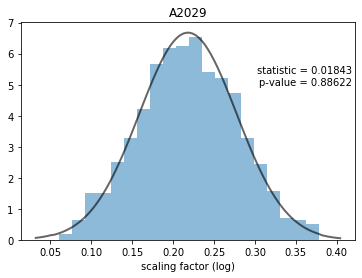

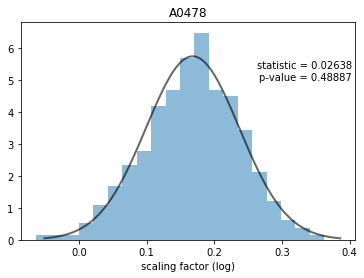

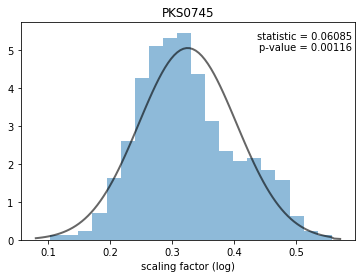

In [15]:
for i in range(0, 3):
    df, nc, loc, scale = stats.nct.fit(planck_new_jks[i], fnc = -planck_skew[i])
    #nct_params.append([df, nc, loc, scale])
    x = np.linspace(stats.nct.ppf(0.001, df, nc, loc=loc, scale=scale), 
                    stats.nct.ppf(0.999, df, nc, loc=loc, scale=scale), 100)
    plt.plot(x, stats.nct.pdf(x, df, nc, loc=loc, scale=scale), 'k-', lw=2, alpha=0.6, label='skew-t pdf')
    plt.hist(planck_new_jks[i], bins=20, density=True, alpha=0.5)
    plt.title(planck_names[i])
    plt.xlabel('scaling factor (log)')
    statistic, pval = stats.kstest(planck_new_jks[i], 'nct', [df, nc, loc, scale])
    plt.text(np.mean(x) + 1.85*np.std(x), 5, s='statistic = ' + str(round(statistic,5)) + '\np-value = ' + str(round(pval,5)), horizontalalignment='right')
    #plt.savefig(planck_names[i] + '_commonly_blinded.jpg')
    plt.show()

### Best-fit skew-t distributions for Planck+Bolocam clusters

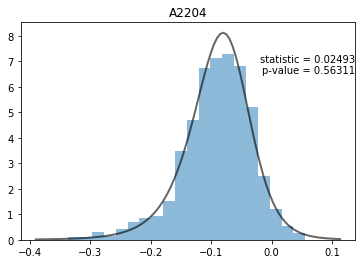

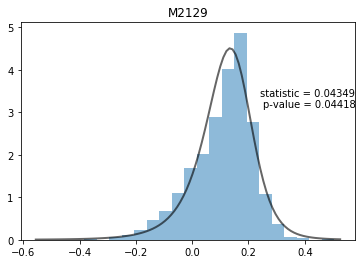

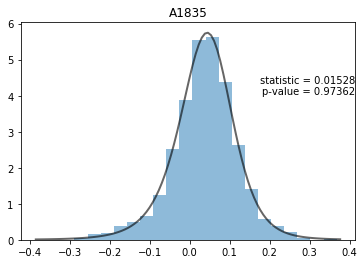

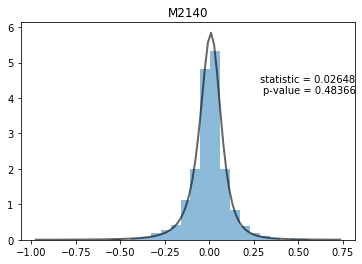

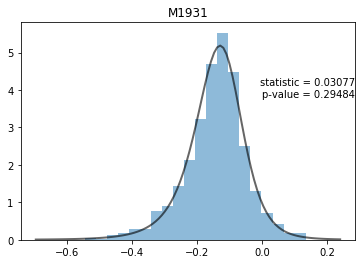

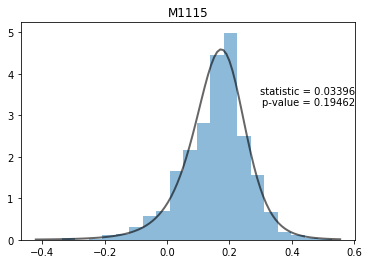

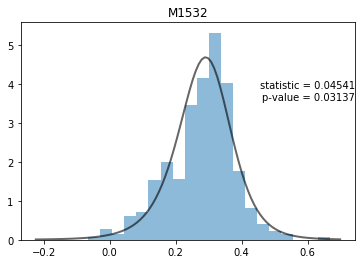

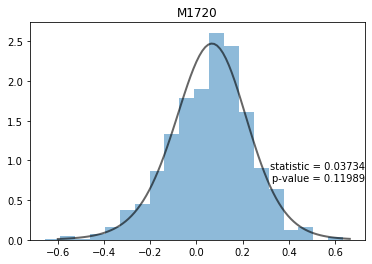

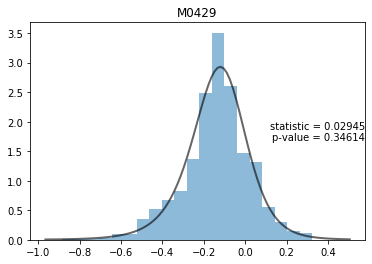

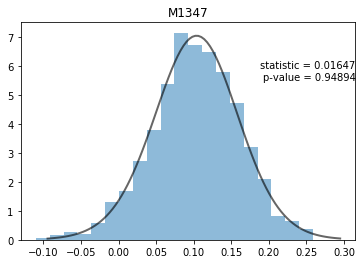

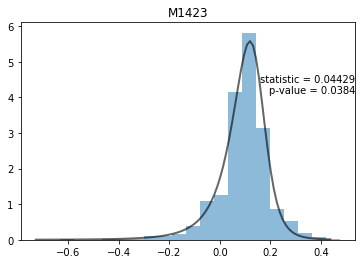

In [16]:
for i in range(0, 11):
    df, nc, loc, scale = stats.nct.fit(bolocam_new_jks[i], fnc = -bolocam_skew[i])
    #nct_params.append([df, nc, loc, scale])
    x = np.linspace(stats.nct.ppf(0.001, df, nc, loc=loc, scale=scale), 
                    stats.nct.ppf(0.999, df, nc, loc=loc, scale=scale), 100)
    fig, ax = plt.subplots()
    ax.plot(x, stats.nct.pdf(x, df, nc, loc=loc, scale=scale), 'k-', lw=2, alpha=0.6, label='skew-t pdf')
    ax.hist(bolocam_new_jks[i], bins=20, density=True, alpha=0.5)
    ax.set_xlim()
    plt.title(bolocam_names[i])
    statistic, pval = stats.kstest(bolocam_new_jks[i], 'nct', [df, nc, loc, scale])
    plt.text(ax.get_xlim()[1], ax.get_ylim()[1] - 2, s='statistic = ' + str(round(statistic,5)) + '\np-value = ' + str(round(pval,5)), horizontalalignment='right')
    #plt.savefig(bolocam_names[i] + '_commonly_blinded.jpg')
    plt.show()

In [18]:
#nct_params

### Overlay PDFs of each cluster

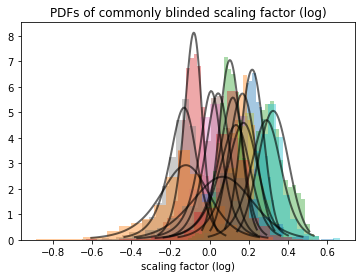

In [19]:
for i in range(0, 3):
    if i == 0:
        df, nc, loc, scale = stats.nct.fit(planck_new_jks[i], fnc = -planck_skew[i]*5.99)
    else:
        df, nc, loc, scale = stats.nct.fit(planck_new_jks[i], fnc = -planck_skew[i])
    x = np.linspace(stats.nct.ppf(0.01, df, nc, loc=loc, scale=scale), 
                    stats.nct.ppf(0.99, df, nc, loc=loc, scale=scale), 100)
    plt.plot(x, stats.nct.pdf(x, df, nc, loc=loc, scale=scale), 'k-', lw=2, alpha=0.6, label='skew-t pdf')
    plt.hist(planck_new_jks[i], bins=20, density=True, alpha=0.4)
    
for i in range(0, 11):
    df, nc, loc, scale = stats.nct.fit(bolocam_new_jks[i], fnc = -bolocam_skew[i])
    x = np.linspace(stats.nct.ppf(0.01, df, nc, loc=loc, scale=scale), 
                    stats.nct.ppf(0.99, df, nc, loc=loc, scale=scale), 100)
    plt.plot(x, stats.nct.pdf(x, df, nc, loc=loc, scale=scale), 'k-', lw=2, alpha=0.6, label='skew-t pdf')
    plt.hist(bolocam_new_jks[i], bins=20, density=True, alpha=0.4)
    
plt.title('PDFs of commonly blinded scaling factor (log)')
plt.xlabel('scaling factor (log)')
#plt.savefig('commonly_blinded_pdfs.jpg')
plt.show()

In [20]:
agn = [0.06263, 0.4546, 4.4708, 2.65, 0.71, 0.77, 0.06, 8.81, 0.42, 1.19, 0.15, 6.70, 4.39, 0.76]
z = [0.078000002, 0.088, 0.103, 0.152, 0.235, 0.252, 0.31299999, 0.352, 0.35499999, 0.36300001, 0.391, 0.39899999, 
    0.45100001, 0.54299998]
lat = [50.545747, -28.289662, 3.0298687, 33.237397, -34.4761415, 60.585978, -46.937141, -20.093319, 55.625633, 
               54.645119, 33.077305, -32.588485, 48.8075905, 68.985614]

color = ['blue', 'red', 'green', 'orange', 'purple', 'pink', 'gold', 'magenta', 'navy', 'chartreuse', 'violet', 
        'black', 'gray', 'indigo']

In [80]:
planck_errors = []
planck_data = []
for i in range(0, 3):
    planck_errors.append(np.std(planck_scaling_factor_jk.columns[i]/blind_vals['col1'][i]))
    planck_data.append(planck_scaling_factor.columns[i]/blind_vals['col1'][i])
    
bolocam_errors = []
bolocam_data = []
for i in range(0, 11):
    bolocam_errors.append(np.std(bolocam_scaling_factor_jk.columns[i]/blind_vals['col1'][i]))
    bolocam_data.append(bolocam_scaling_factor.columns[i]/blind_vals['col1'][i])

### Planck detections vs. no Planck detections

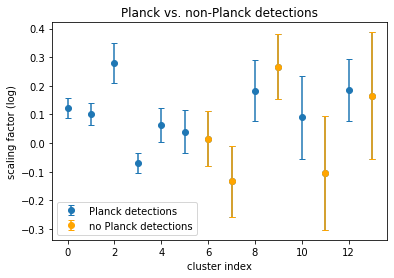

In [81]:
plt.errorbar([0,1,2,3,4,5,6,7,8,9,10,11,12,13], planck_data + bolocam_data, planck_errors + bolocam_errors, ls='',
            marker='o', capsize=3, label='Planck detections')
plt.errorbar([6,7,9,11,13], [bolocam_data[3], bolocam_data[4], bolocam_data[6], bolocam_data[8], bolocam_data[10]], 
             [bolocam_errors[3], bolocam_errors[4], bolocam_errors[6], bolocam_errors[8], bolocam_errors[10]], 
             marker='o', ls='', color='orange', capsize=3, label='no Planck detections')
plt.title('Planck vs. non-Planck detections')
plt.xlabel('cluster index')
plt.ylabel('scaling factor (log)')
plt.legend()
#plt.savefig('planck_detections.jpg')
plt.show()

### Redshift

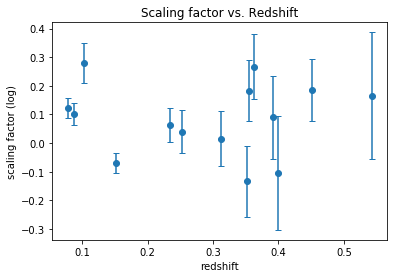

In [82]:
plt.errorbar(z, planck_data + bolocam_data, planck_errors + bolocam_errors, ls='',
            marker='o', capsize=3)
#plt.errorbar([z[0],z[1],z[6]], [planck_data[0], planck_data[1], bolocam_data[3]], 
#             [planck_errors[0], planck_errors[1], bolocam_errors[3]], marker='o', ls='', color='orange', capsize=3)
plt.title('Scaling factor vs. Redshift')
plt.xlabel('redshift')
plt.ylabel('scaling factor (log)')
#plt.savefig('redshift.jpg')
plt.show()

### AGN brightness

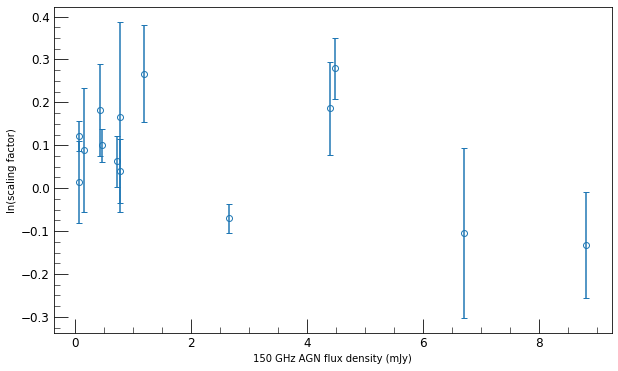

In [187]:
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['ytick.major.size'] = 10
fig, ax = plt.subplots(figsize=(10,6))
plt.errorbar(agn, planck_data + bolocam_data, planck_errors + bolocam_errors, ls='',
            marker='o', fillstyle='none', capsize=3)
#plt.errorbar([agn[6],agn[7],agn[9],agn[11],agn[13]], [bolocam_data[3], bolocam_data[4], bolocam_data[6], bolocam_data[8], bolocam_data[10]], 
#             [bolocam_errors[3], bolocam_errors[4], bolocam_errors[6], bolocam_errors[8], bolocam_errors[10]], 
#             marker='o', ls='', color='orange', capsize=3, label='no Planck detections')
#plt.errorbar([agn[0],agn[1],agn[6]], [planck_data[0], planck_data[1], bolocam_data[3]], 
#             [planck_errors[0], planck_errors[1], bolocam_errors[3]], marker='o', ls='', color='orange', capsize=3)
#plt.title('Scaling factor vs. AGN brightness')
plt.xlabel('150 GHz AGN flux density (mJy)')
plt.ylabel('ln(scaling factor)')
ax.tick_params(direction='in', length=14)
ax.tick_params(which='minor', direction='in', length=6)
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.yaxis.set_minor_locator(MultipleLocator(0.025))
#plt.savefig('/Users/jwan/Documents/research 2020/plots for paper/agn_brightness.jpg')

### Galactic latitutde

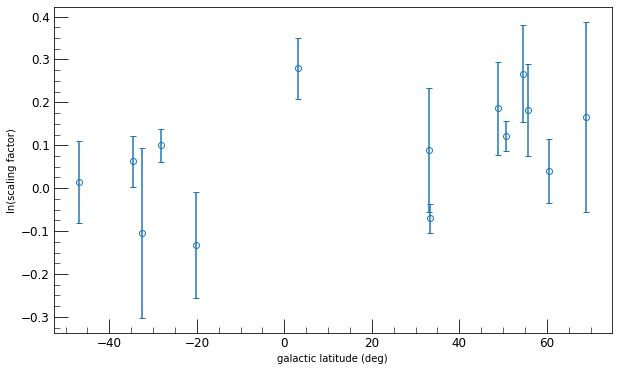

In [188]:
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['ytick.major.size'] = 10
fig, ax = plt.subplots(figsize=(10,6))
plt.errorbar(lat, planck_data + bolocam_data, planck_errors + bolocam_errors, ls='',
            marker='o', fillstyle='none', capsize=3)
#plt.errorbar([lat[0],lat[1],lat[6]], [planck_data[0], planck_data[1], bolocam_data[3]], 
#             [planck_errors[0], planck_errors[1], bolocam_errors[3]], marker='o', ls='', color='orange', capsize=3)
#plt.title('Scaling factor vs. Galactic latitude')
plt.xlabel('galactic latitude (deg)')
plt.ylabel('ln(scaling factor)')
ax.tick_params(direction='in', length=14)
ax.tick_params(which='minor', direction='in', length=6)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(0.025))
#plt.savefig('/Users/jwan/Documents/research 2020/plots for paper/galactic_lat.jpg')
plt.show()

### Cluster ellipticity

In [36]:
ellipticity = [0.198, 0.177, 0.163, 0.179, 0.249, 0.122, 0.128, 0.279, 0.244, 0.196, 0.185, 0.205, 0.205, 0.168]

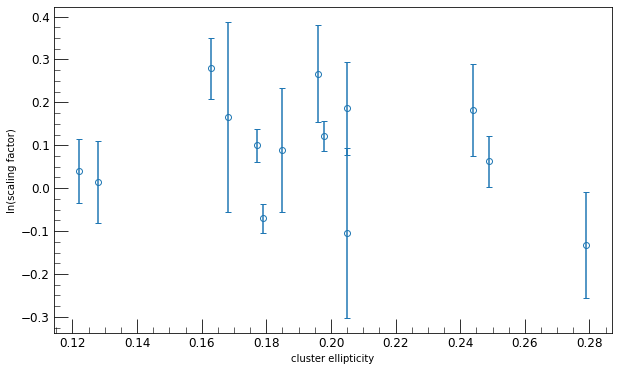

In [189]:
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['ytick.major.size'] = 10
fig, ax = plt.subplots(figsize=(10,6))
plt.errorbar(ellipticity, planck_data + bolocam_data, planck_errors + bolocam_errors, ls='',
            marker='o', fillstyle='none', capsize=3)
#plt.errorbar([lat[0],lat[1],lat[6]], [planck_data[0], planck_data[1], bolocam_data[3]], 
#             [planck_errors[0], planck_errors[1], bolocam_errors[3]], marker='o', ls='', color='orange', capsize=3)
#plt.title('Scaling factor vs. Cluster ellipticity')
plt.xlabel('cluster ellipticity')
plt.ylabel('ln(scaling factor)')
ax.tick_params(direction='in', length=14)
ax.tick_params(which='minor', direction='in', length=6)
ax.xaxis.set_minor_locator(MultipleLocator(0.005))
ax.yaxis.set_minor_locator(MultipleLocator(0.025))
#plt.savefig('/Users/jwan/Documents/research 2020/plots for paper/ellipticity.jpg')
plt.show()

### Galactic dust

In [41]:
dust = [2.98225, 18.14058, 15.40289, 6.56596, 3.00523, 2.41867, 3.56177, 5.78014, 3.39525, 2.25386, 
        2.78995, 3.83618, 4.13646, 2.31825]

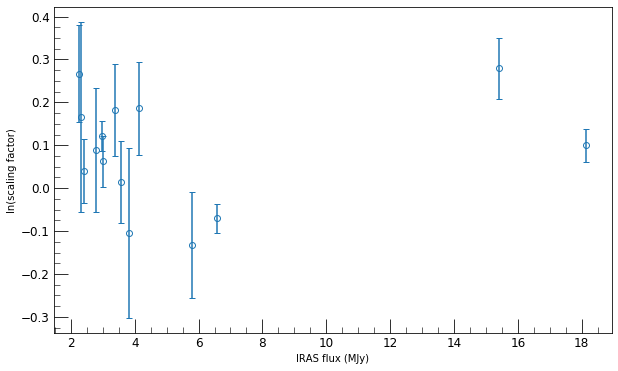

In [190]:
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['ytick.major.size'] = 10
fig, ax = plt.subplots(figsize=(10,6))
plt.errorbar(dust, planck_data + bolocam_data, planck_errors + bolocam_errors, ls='',
            marker='o', fillstyle='none', capsize=3)
#plt.errorbar([dust[2], dust[3]], [planck_data[2], bolocam_data[0]], 
#             [planck_errors[2], bolocam_errors[0]], marker='o', ls='', color='orange', capsize=3)
#plt.title('Scaling factor vs. Dust signal')
plt.xlabel('IRAS flux (MJy)')
plt.ylabel('ln(scaling factor)')
ax.tick_params(direction='in', length=14)
ax.tick_params(which='minor', direction='in', length=6)
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.yaxis.set_minor_locator(MultipleLocator(0.025))
#plt.savefig('/Users/jwan/Documents/research 2020/plots for paper/dust.jpg')
plt.show()

In [88]:
dust_std = [0.421053, 3.70064, 3.72803, 0.645527, 0.237097, 0.184908, 0.168093, 0.620776, 0.276294, 0.143896, 
           0.191584, 0.374795, 0.503053, 0.368663]
dust_rms = [3.1757, 15.0919, 15.1677, 4.7622, 3.06218, 2.48239, 3.56174, 6.32765, 3.38212, 2.36894, 2.69334, 
           3.61926, 4.70542, 2.25143]

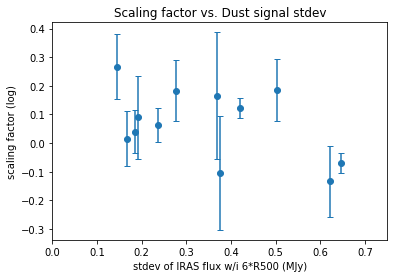

In [89]:
fig, ax = plt.subplots()
ax.errorbar(dust_std, planck_data + bolocam_data, planck_errors + bolocam_errors, ls='',
            marker='o', capsize=3)
ax.set_xlim(0,0.75)
plt.title('Scaling factor vs. Dust signal stdev')
plt.xlabel('stdev of IRAS flux w/i 6*R500 (MJy)')
plt.ylabel('scaling factor (log)')
#plt.savefig('dust_std_zoom.jpg')
plt.show()